<a href="https://colab.research.google.com/github/Looking-forward-to-Ctrlc-Ctrlv/Moodify-NLP/blob/main/Moodify_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<HTML>
<Body>
<h1 align="center" style="text-decoration-line=underline;text-decoration-color=white;"><b>Problem Understanding</b></h1>
<p align="justify" >Many people face the problem of their music app suggesting music that does not match their current mood leading to dissatisfaction and irritation. The problem becomes more prominent when the person is sad and he keeps getting suggested happy songs. Looking at this prevailing problem we are trying to develop a music recommendation app that uses the user's current mood to suggest suitable songs to the user. Our app would target users struggling to find music that reflects their emotional state, providing an easy and convenient way for them to discover and enjoy music that suits their moods. Our users will benefit from personalized music recommendations that match their mood, making their music experience more enjoyable and satisfying.
We have used machine learning in our application to predict the emotion of the users so that we can suggest music they would like to listen to in their current mood. To assess the person’s mood we have to understand what their current situation is, for example, if someone gets a new job they would be happy, but if they lost something very important the most obvious emotion would be sadness. Likewise, if we could not know how our user is feeling at that particular moment we would be able to predict their mood at that time.
In our app, we are taking text input from users about how they are feeling or what situation they are in, and using that prompt we are predicting their current emotions. This section of our report is going to explain the procedure we have followed to achieve accurate prediction of user emotions
</p>

* <b>Buisness Objective</b>
<p align="justify">Our music app will revolutionize how people listen to music by catering to their emotions. The app will assess the user's mood and recommend songs that match their emotions. In addition, we will provide curated playlists and a radio feature that plays music according to the user's mood. Our in-app assistant will provide personalized suggestions and help users discover new music. The app will offer a seamless experience, allowing users to effortlessly switch between features and customize their music experience. With our app, users can easily access music that suits their mood and improve their overall listening experience.
</p>
* <b>Situation</b>
<p align="justify">As a college project, our music app will have limited resources and be deployed on a small scale. However, we will still prioritize the core features of assessing emotions and recommending music, and ensure a seamless user experience. We will focus on creating a functional and user-friendly app within our limited skillset and resources.</p>
* <b>Data Mining Goals</b>
<p align="justify">Our primary objective is to use pre-existing data and advanced data models to accurately predict the mood and emotions of users, allowing us to recommend music tailored to their current state. We will prioritize developing and refining our data models to ensure accurate predictions and personalized music recommendations.
</p>
* <b>Project Plan</b>
<p align="justify">Our music app development process utilized the iterative model, allowing us to create multiple prototypes that we continuously refined and enhanced. We identified and solved problems from the previous version with each iteration, while also adding new features to improve the user experience. Our primary objective was to use advanced data models and pre-existing data to accurately predict user emotions and recommend music tailored to their moods. Despite limited resources and skills, we prioritized the core features of the app to ensure a functional and user-friendly experience.</p></div>
</Body>
</Html>

In [ ]:
#@title Changing Font Size
def increase_font():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize a= '25px'
      rule.style.color = 'black'
      break
    }
  }
  '''))
increase_font()
get_ipython().events.register('pre_run_cell', increase_font)

<IPython.core.display.Javascript object>

<h1><b>Dataset Sources:</b></h1>
  <ul>
    <li><a>https://www.kaggle.com/datasets/parulpandey/emotion-dataset</a>
    <li><a>https://github.com/Jcharis/end2end-nlp-project</li></a>
    <li><a>https://github.com/lukasgarbas/nlp-text-emotion</a>
    <li><a>https://www.kaggle.com/datasets/pashupatigupta/emotion-detection-from-text</a>
  </ul>

 <h1><b>Describing data</b></h1>
 <ul>
  <li> Examining the data and document its surface properties like data format, number of records, or field identities.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<IPython.core.display.Javascript object>

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import data_table
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
from textblob import TextBlob

<IPython.core.display.Javascript object>

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project 2/emotion-dataset(updated-final).csv")
data_table.DataTable(df.head())

<IPython.core.display.Javascript object>

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [ ]:
from IPython.display import HTML
HTML(f'<p style="font-size:20px">Shape of the Dataset: {df.shape}</p>' +
     f'<p style="font-size:20px">Rows: {df.shape[0]}</p>' +
     f'<p style="font-size:20px">Columns: {df.shape[1]}</p>')

<IPython.core.display.Javascript object>

In [ ]:
#Datatype of each column
df.dtypes

<IPython.core.display.Javascript object>

Emotion    object
Text       object
dtype: object

In [ ]:
#Column name
df.columns.tolist()

<IPython.core.display.Javascript object>

['Emotion', 'Text']

In [ ]:
#Checking for null values
df.isnull().sum()

<IPython.core.display.Javascript object>

Emotion    0
Text       0
dtype: int64

In [ ]:
df.describe()

<IPython.core.display.Javascript object>

,Emotion,Text
count,59909,59909
unique,9,56143
top,sadness,Yes .
freq,16553,76


In [ ]:
df['Emotion'].value_counts()

<IPython.core.display.Javascript object>

sadness     16553
joy         16407
fear         7347
anger        6566
love         5146
surprise     4634
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<IPython.core.display.Javascript object>

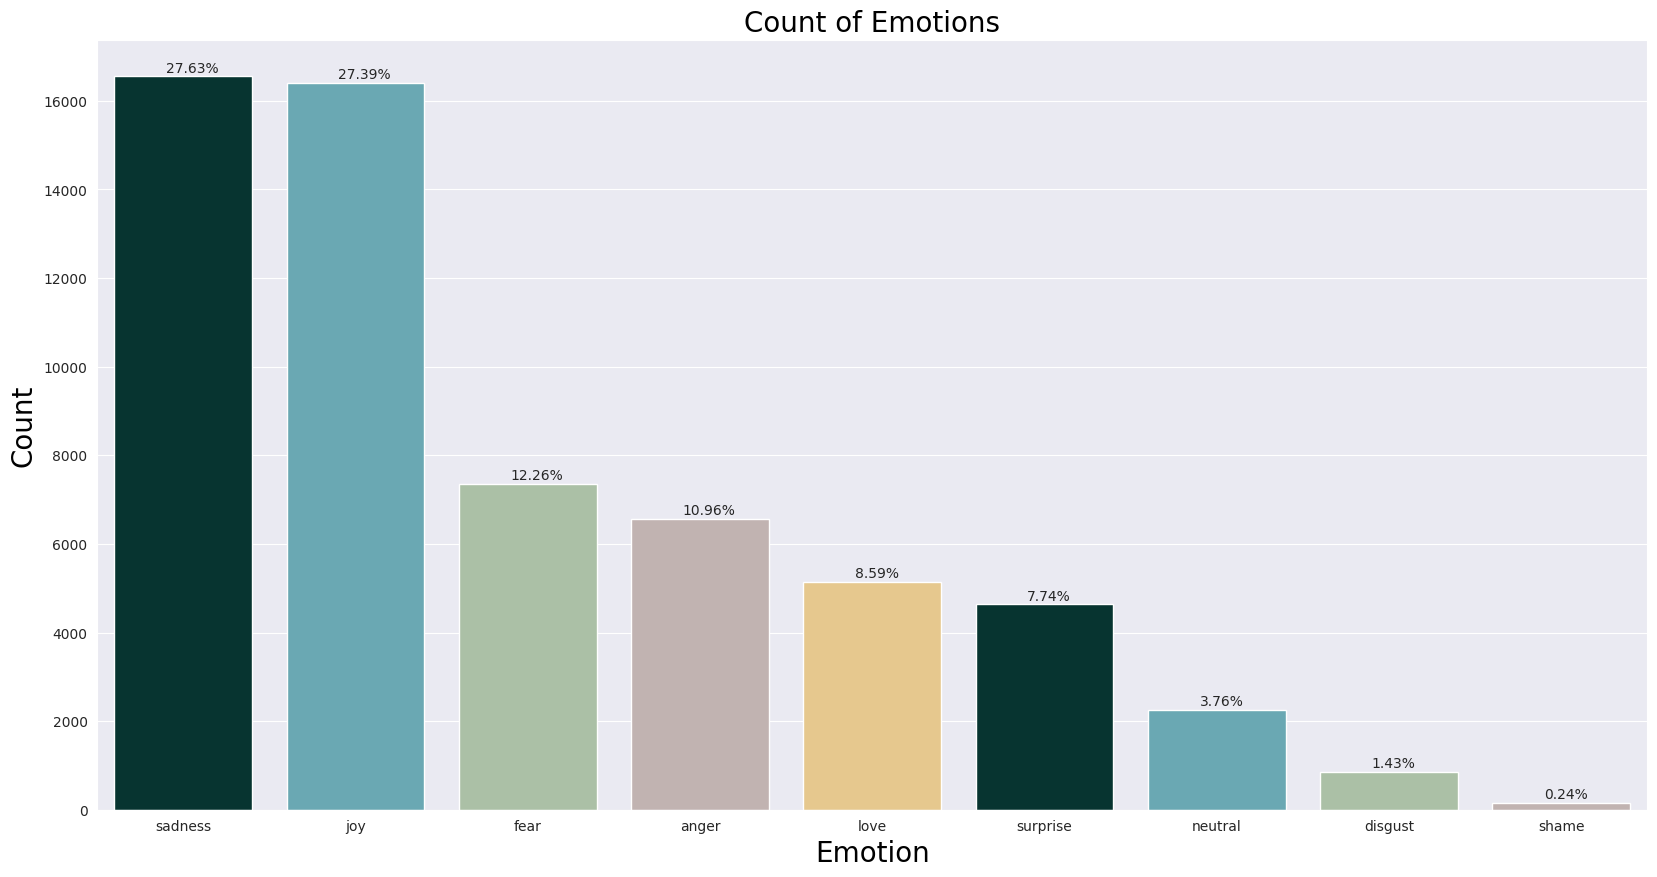

In [ ]:
crest_palette = ['#003B36', '#5EB1BF', '#A8C4A2', '#C4B1AE', '#F5CC7F']

df_sorted = df['Emotion'].value_counts().sort_values(ascending=False).reset_index()
df_sorted.columns = ['Emotion', 'Count']

plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')
ax = sns.countplot(x='Emotion', data=df, palette=crest_palette, order=df_sorted['Emotion'])
percentages = df_sorted['Count'].div(len(df)).mul(100).round(2)
for i, p in enumerate(ax.patches):
    ax.annotate(f"{percentages[i]:.2f}%", (p.get_x() + 0.3, p.get_height() + 100))

plt.xlabel('Emotion',fontdict={'fontsize': 20, 'color': 'black'})
plt.ylabel('Count',fontdict={'fontsize': 20, 'color': 'black'})
plt.title('Count of Emotions', fontdict={'fontsize': 20, 'color': 'black'}, loc='center')
plt.show()
plt.close()

<h2><b>Findings from above analysis</b></h2>
<ul>
  <li>Rows: 59909 , Columns: 2
  <li>There is no NULL value
  <li>Data is imbalance.
  <li>Sadness has the maximum rows datapoints.
  <li>We can remove shame,digust and love since the count is very low.


<h1><b>DATA CLEANING & DATA PREPROCESSING</b></h1>

In [ ]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment = blob.sentiment.polarity
  if sentiment > 0:
    result = "Positive"
  elif sentiment < 0:
    result = "Negative"
  else:
    result = "Neutral"
  return result

<IPython.core.display.Javascript object>

In [ ]:
#Testing function
print(f'I love machine learning : {get_sentiment("I love machine learning")}')
print(f'I like machine learning : {get_sentiment("I like machine learning")}')
print(f'I hate machine learning : {get_sentiment("I hate machine learning")}')

<IPython.core.display.Javascript object>

I love machine learning : Positive
I like machine learning : Neutral
I hate machine learning : Negative


In [ ]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

<IPython.core.display.Javascript object>

In [ ]:
data_table.DataTable(df.head())

<IPython.core.display.Javascript object>

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


<IPython.core.display.Javascript object>

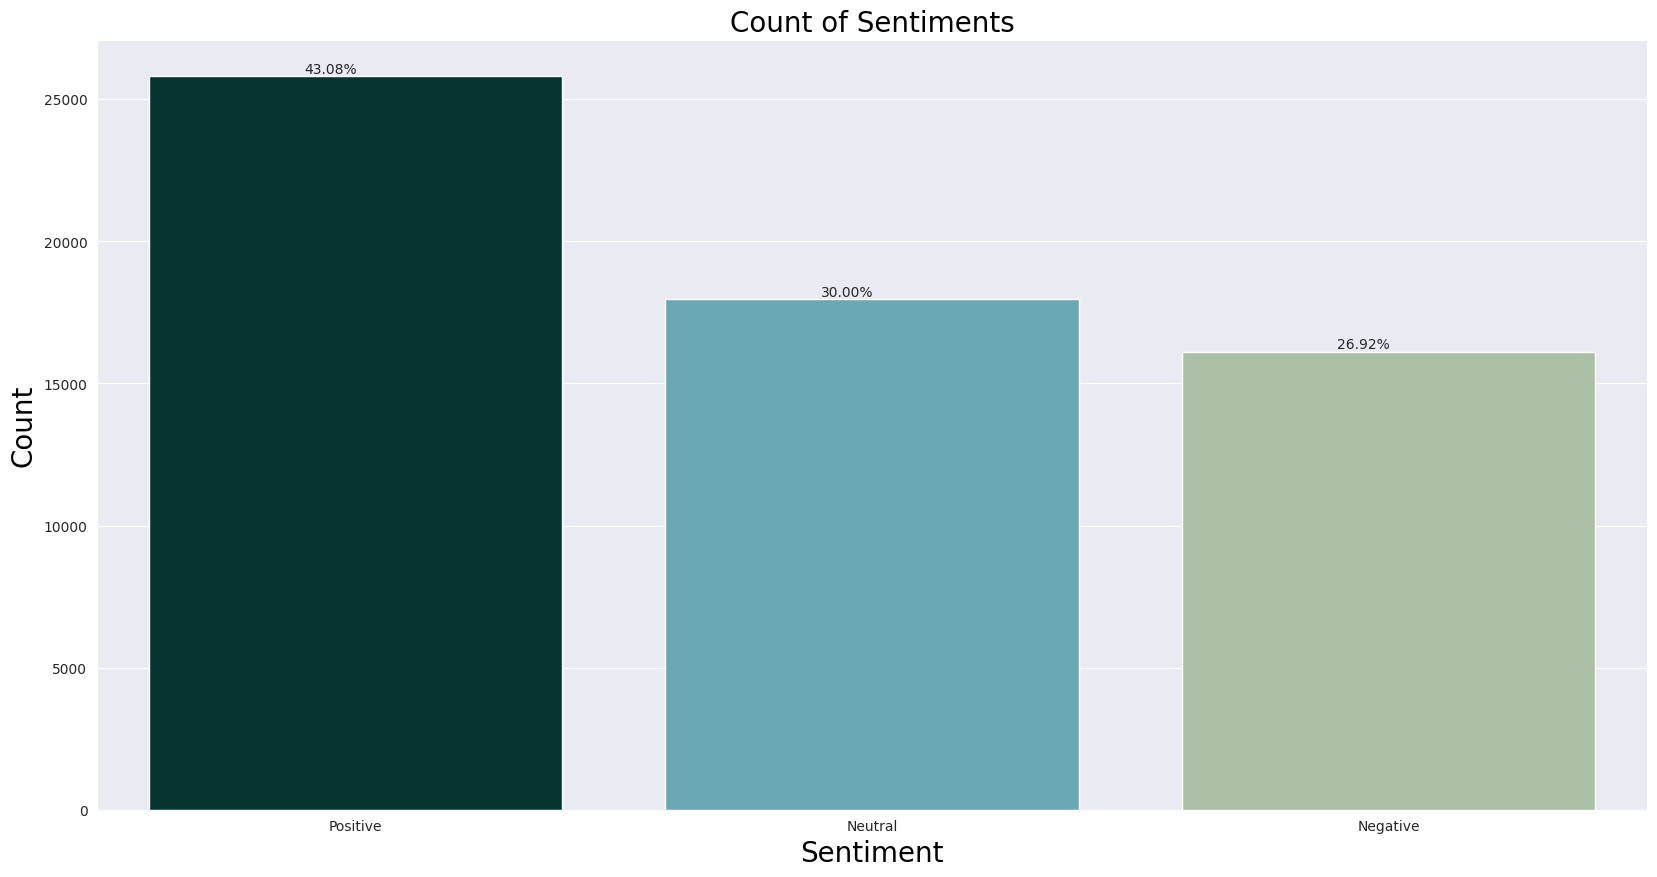

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')
crest_palette = ['#003B36', '#5EB1BF', '#A8C4A2', '#C4B1AE', '#F5CC7F']
ax = sns.countplot(x='Sentiment', data=df, palette=crest_palette, order=df['Sentiment'].value_counts().index)

# Add percentages to bars
percentages = df['Sentiment'].value_counts(normalize=True).mul(100).round(2)
for i, p in enumerate(ax.patches):
    ax.annotate(f"{percentages[i]:.2f}%", (p.get_x() + 0.3, p.get_height() + 100), fontsize=10)

plt.xlabel('Sentiment',fontdict={'fontsize': 20, 'color': 'black'})
plt.ylabel('Count',fontdict={'fontsize': 20, 'color': 'black'})
plt.title('Count of Sentiments', fontdict={'fontsize': 20, 'color': 'black'}, loc='center')

plt.show()
plt.close()

In [ ]:
df['Sentiment'].value_counts()

<IPython.core.display.Javascript object>

Positive    25808
Neutral     17975
Negative    16126
Name: Sentiment, dtype: int64

In [ ]:
df.groupby(['Emotion','Sentiment']).size()

<IPython.core.display.Javascript object>

Emotion   Sentiment
anger     Negative     2868
          Neutral      1972
          Positive     1726
disgust   Negative      324
          Neutral       251
          Positive      281
fear      Negative     2405
          Neutral      2296
          Positive     2646
joy       Negative     2271
          Neutral      4425
          Positive     9711
love      Negative      458
          Neutral       863
          Positive     3825
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     6720
          Neutral      4989
          Positive     4844
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      856
          Neutral      1606
          Positive     2172
dtype: int64

<IPython.core.display.Javascript object>

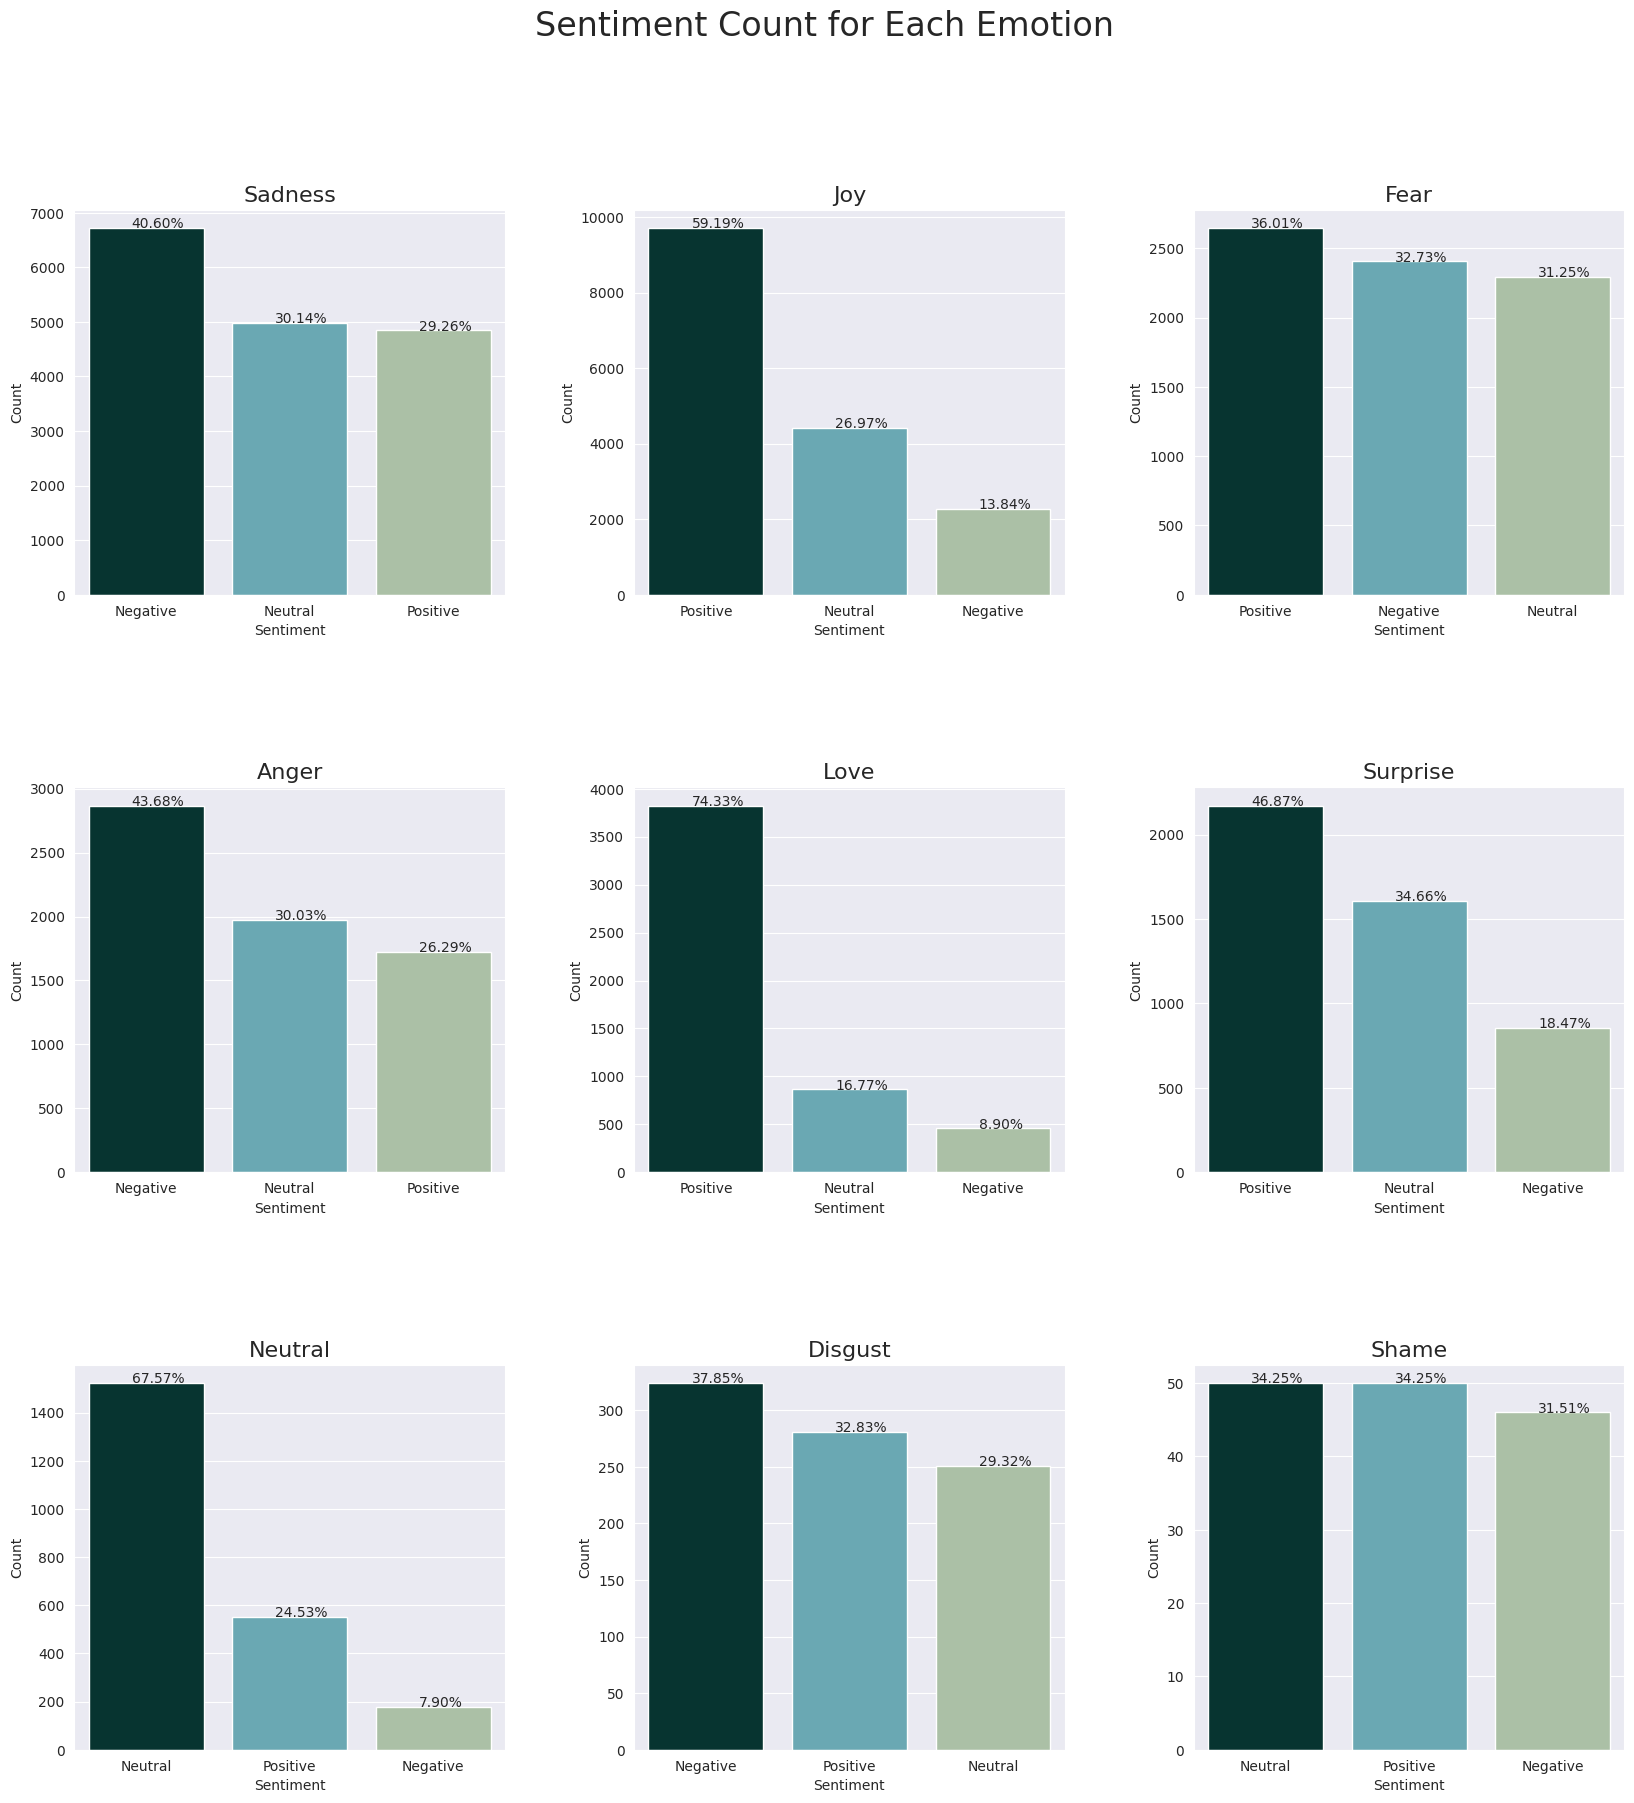

In [ ]:
# Define emotions and palette
emotions = ['sadness', 'joy', 'fear', 'anger', 'love', 'surprise', 'neutral', 'disgust', 'shame']
crest_palette = ['#003B36', '#5EB1BF', '#A8C4A2', '#C4B1AE', '#F5CC7F', '#FFB347', '#C2C2C2', '#B19CD9', '#FFA6C9']

# Create grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# Loop through emotions and create countplots
for i, emotion in enumerate(emotions):
    row = i // 3
    col = i % 3
    df_filtered = df[df['Emotion'] == emotion]
    ax = sns.countplot(x='Sentiment', data=df_filtered, palette=crest_palette, order=df_filtered['Sentiment'].value_counts().index, ax=axes[row, col])
    ax.set_xlabel('Sentiment')
    ax.set_ylabel('Count')
    ax.set_title(f'{emotion.capitalize()}', fontsize=16)

    # Add percentages to bars
    percentages = df_filtered['Sentiment'].value_counts(normalize=True).mul(100).round(2)
    for j, p in enumerate(ax.patches):
        ax.annotate(f"{percentages[j]:.2f}%", (p.get_x() + 0.3, p.get_height()), fontsize=10)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Set overall title
plt.suptitle('Sentiment Count for Each Emotion', fontsize=24)

plt.show()
plt.close()

In [ ]:
df = df[df.Emotion != 'disgust']
df = df[df.Emotion != 'surprise']
df = df[df.Emotion != 'shame']

<IPython.core.display.Javascript object>

In [ ]:
!pip install neattext
import neattext.functions as nfx

<IPython.core.display.Javascript object>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")

def clean_sentence(sentence):
    # Remove special characters and numbers
    sentence = re.sub(r'[^a-zA-Z]', ' ', sentence)
    # Convert to lowercase
    sentence = sentence.lower()
    # Remove URLs
    sentence = re.sub(r'http\S+', '', sentence)
    # Split into words
    sentence = sentence.split()
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    sentence = [lemmatizer.lemmatize(word) for word in sentence]
    # Join the words back together
    sentence = ' '.join(sentence)
    return sentence


df['Clean_Text'] = df['Text'].apply(nfx.remove_punctuations)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(lambda x: clean_sentence(x))


data_table.DataTable(df[['Text','Clean_Text']].head())

<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,sage act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,way homegirl baby funeral man hate funeral sho...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant regular featur...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e ba...


In [ ]:
df.isnull().sum()

<IPython.core.display.Javascript object>

Emotion       0
Text          0
Sentiment     0
Clean_Text    0
dtype: int64

In [ ]:
def extract_keywords(text,num = 50):
  tokens = [ tok for tok in text.split()]
  most_common_tokens = Counter(tokens).most_common(num)
  return dict(most_common_tokens)

<IPython.core.display.Javascript object>

In [ ]:
emotion_list = df['Emotion'].unique().tolist()
emotion_list

<IPython.core.display.Javascript object>

['neutral', 'joy', 'sadness', 'fear', 'anger', 'love']

In [ ]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text']

<IPython.core.display.Javascript object>

In [ ]:
joy_docs = ' '.join(joy_list)

<IPython.core.display.Javascript object>

In [ ]:
keyword_joy = extract_keywords(joy_docs)

<IPython.core.display.Javascript object>

In [ ]:
def plot_most_common_words(mydict):
  x = mydict.items()
  df_01 = pd.DataFrame(x,columns=["token","count"])
  crest_palette = ['#003B36', '#5EB1BF', '#A8C4A2', '#C4B1AE', '#F5CC7F']
  plt.figure(figsize = (20,10))
  plt.title('Most Common Words', fontdict={'fontsize': 20, 'color': 'blue'}, loc='center')
  ax = sns.barplot(x='token',y='count',data = df_01, palette=crest_palette )
  ax.set_xlabel('Token', fontsize=16, color='black')
  ax.set_ylabel('Count', fontsize=16, color='black')
  plt.xticks(rotation=45, fontsize=12, color='black')
  plt.yticks(fontsize=12, color='black')
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

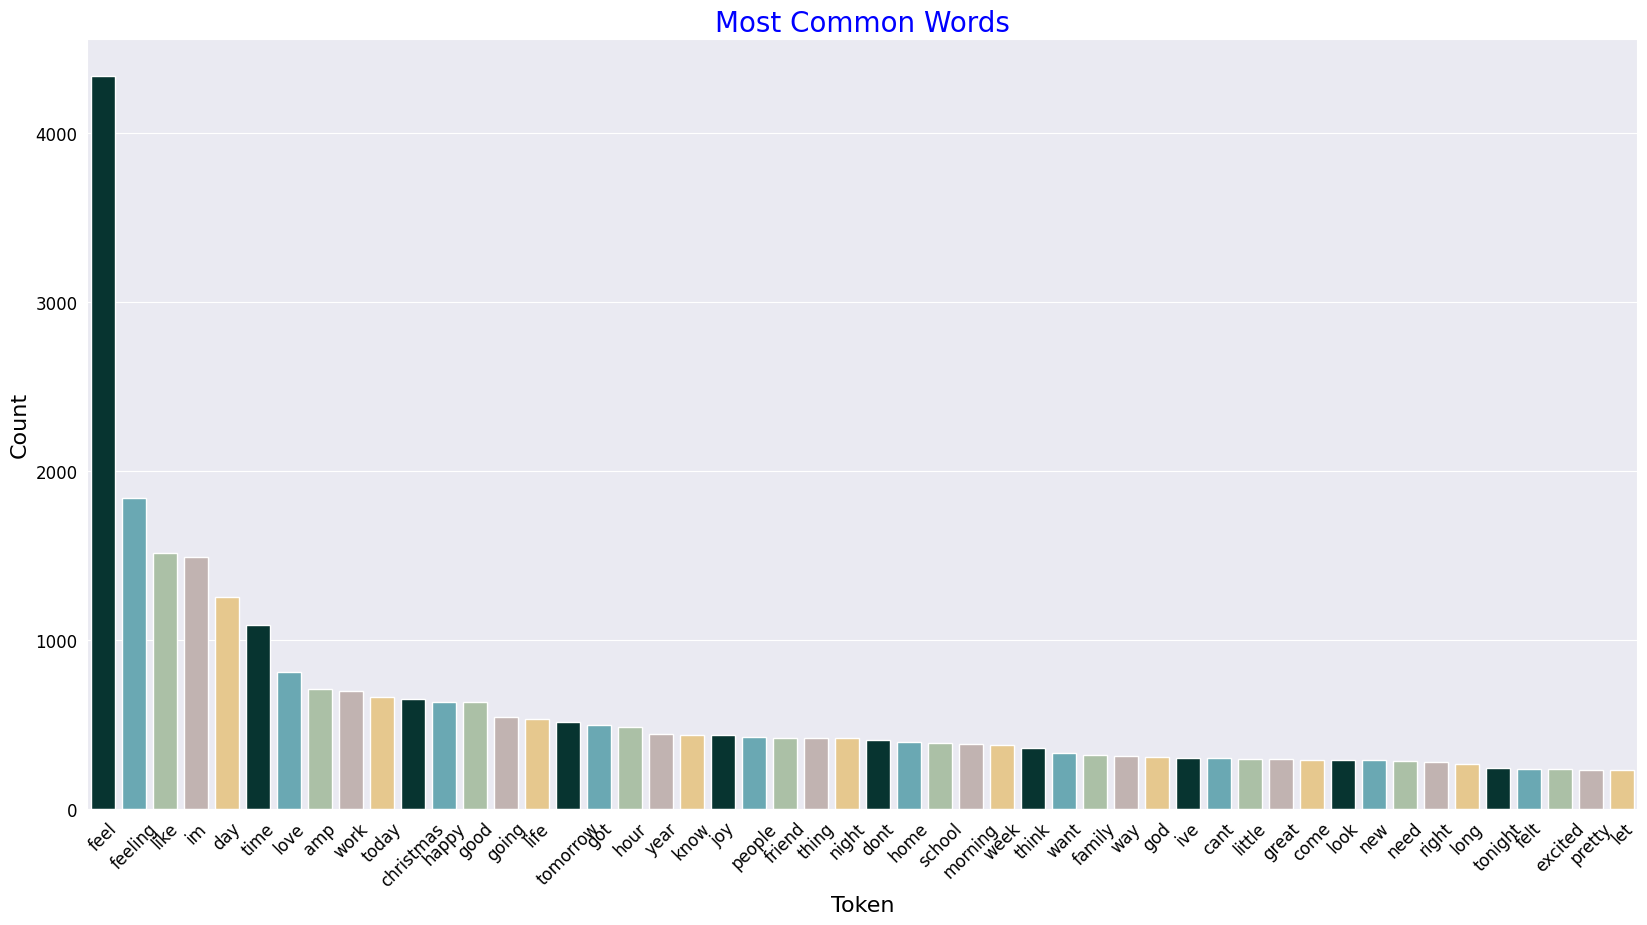

In [ ]:
plot_most_common_words(keyword_joy)

In [ ]:
sadness_list = df[df['Emotion'] == 'sadness']['Clean_Text']
sadness_docs = ' '.join(sadness_list)
keyword_sadness = extract_keywords(sadness_docs)
keyword_sadness

<IPython.core.display.Javascript object>

{'feel': 3802,
 'im': 2042,
 'feeling': 1848,
 'like': 1479,
 'day': 1021,
 'sad': 872,
 'time': 842,
 'dont': 734,
 'know': 684,
 'cant': 630,
 'friend': 602,
 'work': 598,
 'miss': 587,
 'today': 571,
 'going': 538,
 'want': 525,
 'got': 497,
 'sorry': 488,
 'think': 462,
 'good': 461,
 'people': 452,
 'thing': 441,
 'home': 440,
 'life': 433,
 'love': 409,
 'year': 407,
 'bad': 394,
 'didnt': 391,
 'ive': 376,
 'need': 348,
 'week': 336,
 'felt': 330,
 'little': 324,
 'night': 322,
 'way': 318,
 'right': 315,
 'wish': 301,
 'oh': 296,
 'away': 289,
 'left': 289,
 'u': 281,
 'hate': 278,
 'died': 275,
 'school': 266,
 'lost': 261,
 'new': 261,
 'come': 260,
 'ill': 258,
 'amp': 249,
 'thought': 245}

<IPython.core.display.Javascript object>

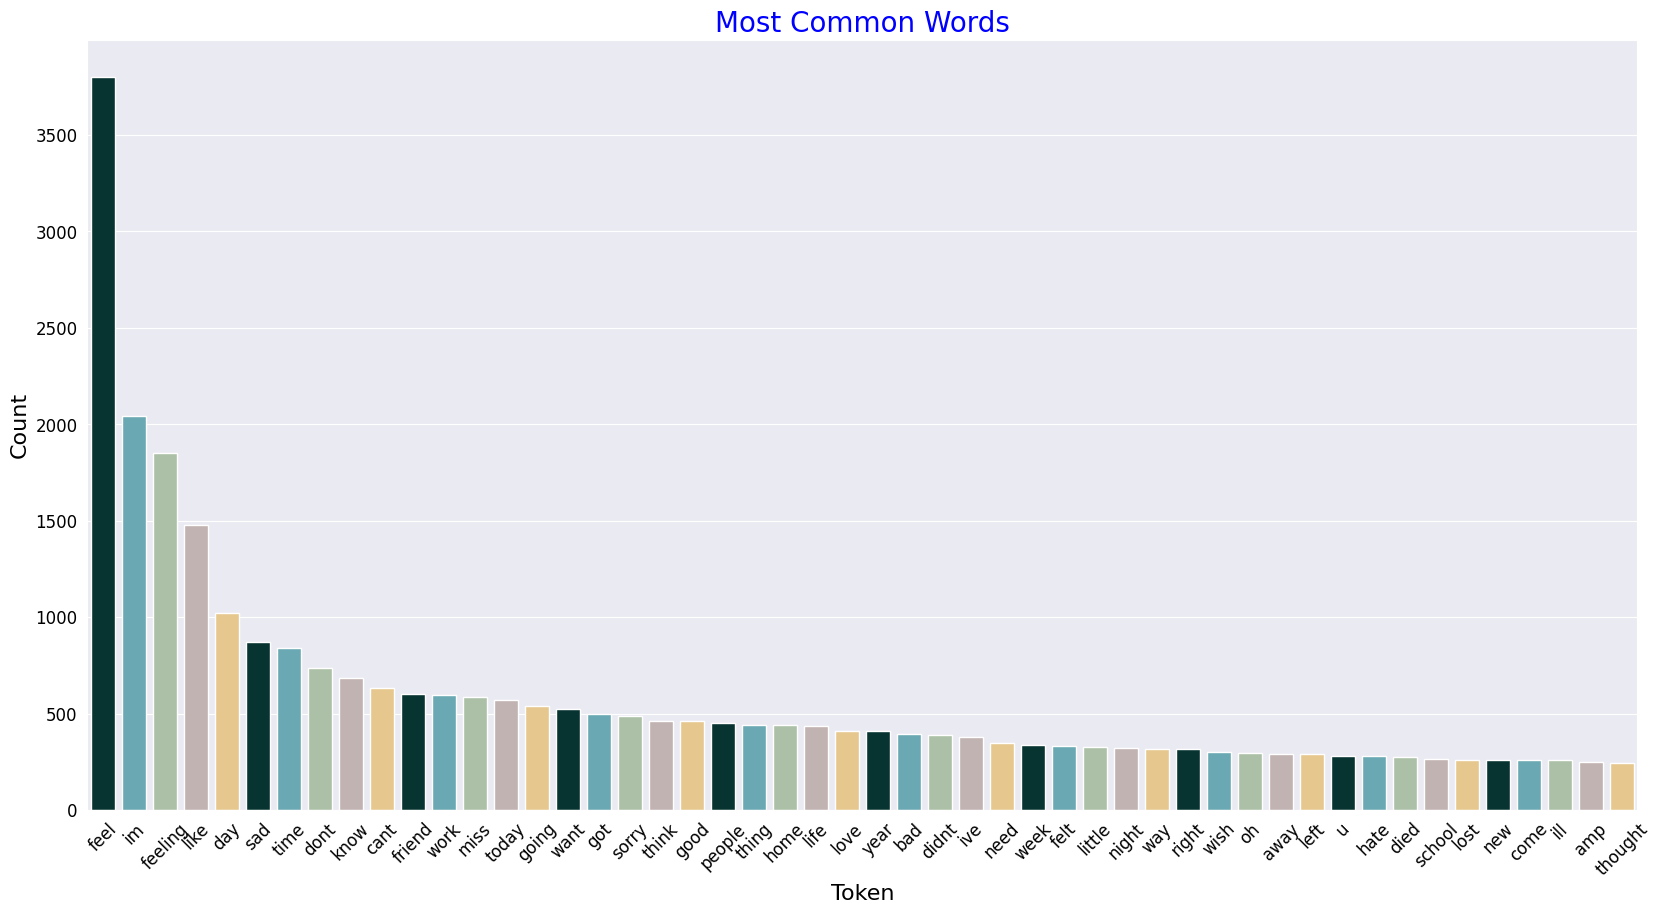

In [ ]:
plot_most_common_words(keyword_sadness)

<h1><b>Modeling</b></h1>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

<IPython.core.display.Javascript object>

In [ ]:
# # Load data
# data = df

# # Split data into training, validation, and testing sets
# train_data, test_data, train_labels, test_labels = train_test_split(data['Clean_Text'], data['Emotion'], test_size=0.2, random_state=42)
# train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# # Vectorize text data using CountVectorizer
# vectorizer = CountVectorizer()
# train_features = vectorizer.fit_transform(train_data)
# val_features = vectorizer.transform(val_data)
# test_features = vectorizer.transform(test_data)

# Load data
data = df

# Replace "love" with "joy" in the 'Emotion' column
data['Emotion'] = data['Emotion'].replace('love', 'joy')

# Split data into training, validation, and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data['Clean_Text'], data['Emotion'], test_size=0.2, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

# Vectorize text data using CountVectorizer
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_data)
val_features = vectorizer.transform(val_data)
test_features = vectorizer.transform(test_data)

<IPython.core.display.Javascript object>

In [ ]:
# Train a Naive Bayes model
nb = MultinomialNB()
nb.fit(train_features, train_labels)

# Make predictions on the validation and test sets
val_predictions = nb.predict(val_features)
test_predictions = nb.predict(test_features)

# Evaluate model performance on validation and test sets
val_accuracy = accuracy_score(val_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Validation Accuracy (Naive Bayes): {:.2f}%".format(val_accuracy * 100))
print("Testing Accuracy (Naive Bayes): {:.2f}%".format(test_accuracy * 100))

<IPython.core.display.Javascript object>

Validation Accuracy (Naive Bayes): 68.11%
Testing Accuracy (Naive Bayes): 68.69%


In [ ]:
# Generate classification report for validation set
val_report = classification_report(val_labels, val_predictions)
print("Classification Report (Validation Set):\n", val_report)

# Generate classification report for test set
test_report = classification_report(test_labels, test_predictions)
print("Classification Report (Test Set):\n", test_report)

<IPython.core.display.Javascript object>

Classification Report (Validation Set):
               precision    recall  f1-score   support

       anger       0.80      0.44      0.57      1096
        fear       0.80      0.52      0.63      1174
         joy       0.67      0.86      0.76      3476
     neutral       0.60      0.01      0.02       351
     sadness       0.64      0.71      0.67      2587

    accuracy                           0.68      8684
   macro avg       0.70      0.51      0.53      8684
weighted avg       0.69      0.68      0.66      8684

Classification Report (Test Set):
               precision    recall  f1-score   support

       anger       0.77      0.44      0.56      1264
        fear       0.80      0.54      0.64      1475
         joy       0.68      0.86      0.76      4344
     neutral       0.67      0.01      0.02       455
     sadness       0.66      0.71      0.68      3317

    accuracy                           0.69     10855
   macro avg       0.71      0.51      0.53     10855
w

In [ ]:
# Train a Logistic Regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(train_features, train_labels)

# Make predictions on the validation and test sets
val_predictions = lr.predict(val_features)
test_predictions = lr.predict(test_features)

# Evaluate model performance on validation and test sets
val_accuracy = accuracy_score(val_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

<IPython.core.display.Javascript object>

Validation Accuracy: 74.22%
Testing Accuracy: 73.89%


In [ ]:
# Generate classification report for validation set
val_report = classification_report(val_labels, val_predictions)
print("Classification Report (Validation Set):\n", val_report)

# Generate classification report for test set
test_report = classification_report(test_labels, test_predictions)
print("Classification Report (Test Set):\n", test_report)

<IPython.core.display.Javascript object>

Classification Report (Validation Set):
               precision    recall  f1-score   support

       anger       0.78      0.58      0.67      1096
        fear       0.81      0.67      0.73      1174
         joy       0.76      0.84      0.80      3476
     neutral       0.58      0.65      0.61       351
     sadness       0.70      0.73      0.71      2587

    accuracy                           0.74      8684
   macro avg       0.73      0.69      0.70      8684
weighted avg       0.75      0.74      0.74      8684

Classification Report (Test Set):
               precision    recall  f1-score   support

       anger       0.75      0.60      0.67      1264
        fear       0.78      0.68      0.73      1475
         joy       0.75      0.83      0.79      4344
     neutral       0.63      0.67      0.65       455
     sadness       0.72      0.71      0.72      3317

    accuracy                           0.74     10855
   macro avg       0.73      0.70      0.71     10855
w

In [ ]:
# Train a Logistic Regression model with L1 regularization
lr_l1 = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear')
lr_l1.fit(train_features, train_labels)

# Make predictions on the validation and test sets
val_predictions = lr_l1.predict(val_features)
test_predictions = lr_l1.predict(test_features)

# Evaluate model performance on validation and test sets
val_accuracy = accuracy_score(val_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Validation Accuracy (L1 regularization): {:.2f}%".format(val_accuracy * 100))
print("Testing Accuracy (L1 regularization): {:.2f}%".format(test_accuracy * 100))

<IPython.core.display.Javascript object>

Validation Accuracy (L1 regularization): 73.02%
Testing Accuracy (L1 regularization): 73.18%


In [ ]:
# Generate classification report for validation set
val_report = classification_report(val_labels, val_predictions)
print("Classification Report (Validation Set):\n", val_report)

# Generate classification report for test set
test_report = classification_report(test_labels, test_predictions)
print("Classification Report (Test Set):\n", test_report)

<IPython.core.display.Javascript object>

Classification Report (Validation Set):
               precision    recall  f1-score   support

       anger       0.81      0.57      0.67      1096
        fear       0.83      0.65      0.73      1174
         joy       0.72      0.86      0.78      3476
     neutral       0.58      0.26      0.36       351
     sadness       0.70      0.72      0.71      2587

    accuracy                           0.73      8684
   macro avg       0.73      0.61      0.65      8684
weighted avg       0.73      0.73      0.72      8684

Classification Report (Test Set):
               precision    recall  f1-score   support

       anger       0.79      0.59      0.67      1264
        fear       0.80      0.66      0.73      1475
         joy       0.72      0.85      0.78      4344
     neutral       0.62      0.29      0.39       455
     sadness       0.72      0.72      0.72      3317

    accuracy                           0.73     10855
   macro avg       0.73      0.62      0.66     10855
w

In [ ]:
# # Train a SVM model
# svm = SVC(kernel='rbf')
# svm.fit(train_features, train_labels)

# # Make predictions on the validation and test sets
# val_predictions = svm.predict(val_features)
# test_predictions = svm.predict(test_features)

# # Evaluate model performance on validation and test sets
# val_accuracy = accuracy_score(val_labels, val_predictions)
# test_accuracy = accuracy_score(test_labels, test_predictions)

# print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))
# print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))

<IPython.core.display.Javascript object>

In [ ]:
# Generate classification report for validation set
val_report = classification_report(val_labels, val_predictions)
print("Classification Report (Validation Set):\n", val_report)

# Generate classification report for test set
test_report = classification_report(test_labels, test_predictions)
print("Classification Report (Test Set):\n", test_report)

<IPython.core.display.Javascript object>

Classification Report (Validation Set):
               precision    recall  f1-score   support

       anger       0.81      0.57      0.67      1096
        fear       0.83      0.65      0.73      1174
         joy       0.72      0.86      0.78      3476
     neutral       0.58      0.26      0.36       351
     sadness       0.70      0.72      0.71      2587

    accuracy                           0.73      8684
   macro avg       0.73      0.61      0.65      8684
weighted avg       0.73      0.73      0.72      8684

Classification Report (Test Set):
               precision    recall  f1-score   support

       anger       0.79      0.59      0.67      1264
        fear       0.80      0.66      0.73      1475
         joy       0.72      0.85      0.78      4344
     neutral       0.62      0.29      0.39       455
     sadness       0.72      0.72      0.72      3317

    accuracy                           0.73     10855
   macro avg       0.73      0.62      0.66     10855
w

In [ ]:
# Train a simple Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(train_features, train_labels)

# Make predictions on the validation and test sets
val_predictions = rf.predict(val_features)
test_predictions = rf.predict(test_features)

# Evaluate model performance on validation and test sets
val_accuracy = accuracy_score(val_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Validation Accuracy (Random Forest): {:.2f}%".format(val_accuracy * 100))
print("Testing Accuracy (Random Forest): {:.2f}%".format(test_accuracy * 100))

<IPython.core.display.Javascript object>

Validation Accuracy (Random Forest): 71.00%
Testing Accuracy (Random Forest): 71.12%


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report for validation set
val_report = classification_report(val_labels, val_predictions)
print("Classification Report (Validation Set):\n", val_report)

# Generate classification report for test set
test_report = classification_report(test_labels, test_predictions)
print("Classification Report (Test Set):\n", test_report)

<IPython.core.display.Javascript object>

Classification Report (Validation Set):
               precision    recall  f1-score   support

       anger       0.84      0.54      0.66      1096
        fear       0.87      0.64      0.74      1174
         joy       0.75      0.80      0.77      3476
     neutral       0.32      0.79      0.46       351
     sadness       0.69      0.68      0.69      2587

    accuracy                           0.71      8684
   macro avg       0.70      0.69      0.66      8684
weighted avg       0.74      0.71      0.72      8684

Classification Report (Test Set):
               precision    recall  f1-score   support

       anger       0.79      0.53      0.64      1264
        fear       0.88      0.67      0.76      1475
         joy       0.75      0.80      0.77      4344
     neutral       0.33      0.76      0.46       455
     sadness       0.71      0.68      0.69      3317

    accuracy                           0.71     10855
   macro avg       0.69      0.69      0.66     10855
w

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV

# # 1. Feature Engineering (if needed)
# # Perform feature selection or engineering here, e.g., using sklearn's SelectKBest or PolynomialFeatures.

# # 2. Hyperparameter Tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# rf = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
# grid_search.fit(train_features, train_labels)

# best_rf = grid_search.best_estimator_

# # 3. Evaluate model performance on validation set
# val_predictions = best_rf.predict(val_features)
# val_accuracy = accuracy_score(val_labels, val_predictions)

# print("Validation Accuracy (Random Forest): {:.2f}%".format(val_accuracy * 100))

# # 4. Evaluate model performance on test set
# test_predictions = best_rf.predict(test_features)
# test_accuracy = accuracy_score(test_labels, test_predictions)

# print("Testing Accuracy (Random Forest): {:.2f}%".format(test_accuracy * 100))


<IPython.core.display.Javascript object>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
gb_classifier.fit(train_features, train_labels)

# Make predictions on the validation and test sets
val_predictions = gb_classifier.predict(val_features)
test_predictions = gb_classifier.predict(test_features)

# Evaluate model performance on validation and test sets
val_accuracy = accuracy_score(val_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Validation Accuracy (Gradient Boosting): {:.2f}%".format(val_accuracy * 100))
print("Testing Accuracy (Gradient Boosting): {:.2f}%".format(test_accuracy * 100))


<IPython.core.display.Javascript object>

Validation Accuracy (Gradient Boosting): 61.94%
Testing Accuracy (Gradient Boosting): 60.62%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model with L1 regularization
lr_l1 = LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', C=10)  # You can adjust C as needed

# Train the model on the training data
lr_l1.fit(train_features, train_labels)

# Make predictions on the validation and test sets
val_predictions = lr_l1.predict(val_features)
test_predictions = lr_l1.predict(test_features)

# Evaluate model performance on validation and test sets
val_accuracy = accuracy_score(val_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Validation Accuracy (L1 regularization): {:.2f}%".format(val_accuracy * 100))
print("Testing Accuracy (L1 regularization): {:.2f}%".format(test_accuracy * 100))


<IPython.core.display.Javascript object>

Validation Accuracy (L1 regularization): 72.08%
Testing Accuracy (L1 regularization): 71.73%


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create an SVC model
svc = SVC(kernel='linear', C=1.0)  # You can adjust the kernel and C parameter as needed

# Train the model on the training data
svc.fit(train_features, train_labels)

# Make predictions on the validation and test sets
val_predictions = svc.predict(val_features)
test_predictions = svc.predict(test_features)

# Evaluate model performance on validation and test sets
val_accuracy = accuracy_score(val_labels, val_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

print("Validation Accuracy (SVC): {:.2f}%".format(val_accuracy * 100))
print("Testing Accuracy (SVC): {:.2f}%".format(test_accuracy * 100))


<IPython.core.display.Javascript object>

Validation Accuracy (SVC): 72.59%
Testing Accuracy (SVC): 71.62%


In [ ]:
# def rec(input):
#   input = vectorizer.transform([input])
#   input = input.toarray()
#   input = input.flatten()
#   pre = lr.predict([input])
#   print(f'Result:',pre[0])
#   recommeded_songs = get_songs_by_emotion(pre[0])
#   print(f'Songs:',recommeded_songs)
#   return recommeded_songs


<IPython.core.display.Javascript object>

In [ ]:
# #Trial function for server
# import json
# import random

# data = pd.read_csv("/content/drive/MyDrive/ML datasets/Cleaned_Bollywood_dataset.csv")

# def get_songs_by_emotion(emotion):
#     song_list = []
#     for i in data.index:
#         if data.loc[i, "emotion"] == emotion:
#             song_list.append({
#                 "videoId": data.loc[i, "Song-Name"],
#                 "title": data.loc[i, "Song-Name"],
#                 "thumbnailUrl": data.loc[i, "Song-Name"],
#                 "channelTitle": data.loc[i, "Song-Name"]
#             })
#     return json.dumps(random.sample(song_list,3))


<IPython.core.display.Javascript object>

In [ ]:
# string = "My life is messed up"
# songs = rec(string)
# print(f'Statement:',string)
# songs

<IPython.core.display.Javascript object>

<h1><b>Deployment</b></h1>

In [ ]:
# import pickle

# pickle_out = open('classifier.pkl',"wb")
# pickle.dump(lr,pickle_out)
# pickle_out.close()

<IPython.core.display.Javascript object>